<a href="https://colab.research.google.com/github/hbeck118/GIS/blob/main/Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Counties Germany Map

In [1]:
!pip install geopandas==1.0.1

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version
gpd.__version__

'1.0.1'

In [4]:
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.4 MB/s eta 0:00:00


In [5]:
#Shapefile of counties from https://data.opendatasoft.com/explore/dataset/georef-germany-kreis%40public/export/?disjunctive.lan_code&disjunctive.lan_name&disjunctive.krs_code&disjunctive.krs_name&disjunctive.krs_name_short
! wget -q -O germany_counties.zip https://docs.google.com/uc?id=12_vFQomIzk5D9VpAgsf8aeBpl5ONXfij&export=download

zip_ref = zipfile.ZipFile('germany_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ger0=gpd.read_file('georef-germany-kreis-millesime.shp')

<Axes: >

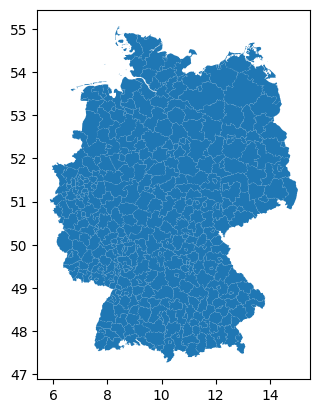

In [6]:
ger0.plot()

In [7]:
#importing data on foreign born population in Germany from https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/
gerfb=pd.read_excel('https://docs.google.com/uc?id=1V6ZoC0HvmVnGKbnXj98IE3QvCKNKNFfg&export=download')

In [ ]:
gerfb.head(10)

,Statistik_Code,Statistik_Label,Stichtag,Region,AGS_Kreis,Geschlecht_Insgesamt_Anzahl,Geschlecht_Maennlich_Anzahl,Geschlecht_Weiblich_Anzahl,Staatsangehoerigkeit_EU-Staaten_Anzahl,Staatsangehoerigkeit_EU-Drittstaaten_Anzahl,Alter_unter_6_Anzahl,Alter_6_und_mehr_Anzahl,Alter_unter_18_Anzahl,Alter_18_und_mehr_Anzahl,Alter_unter_15_Anzahl,Alter_15_bis_unter_65_Anzahl,Alter_65_und_mehr_Anzahl
0,12521,Auslaenderstatistik,31.12.2023,Deutschland ...,Kein_AGS ...,13895865,7305525,6590340,5113875,8781990,748770,13147095,2360060,11535805,1971880,10668475,1255510
1,12521,Auslaenderstatistik,31.12.2023,Schleswig-Holstein ...,Kein_AGS ...,346690,181990,164700,107365,239325,22015,324675,70625,276065,58630,259355,28705
2,12521,Auslaenderstatistik,31.12.2023,Flensburg_Stadt ...,01001 ...,19020,10310,8710,8005,11015,1335,17685,3800,15225,3120,14530,1370
3,12521,Auslaenderstatistik,31.12.2023,Kiel_Stadt ...,01002 ...,36755,18990,17770,7715,29040,2420,34340,7295,29460,6090,27605,3060
4,12521,Auslaenderstatistik,31.12.2023,Luebeck_Stadt ...,01003 ...,31770,16370,15400,9160,22610,1715,30060,5530,26240,4600,23910,3265
5,12521,Auslaenderstatistik,31.12.2023,Neumuenster_Stadt ...,01004 ...,14760,8005,6750,4955,9805,1010,13750,3230,11530,2685,11085,990
6,12521,Auslaenderstatistik,31.12.2023,Dithmarschen ...,01051 ...,12520,6735,5785,4430,8090,985,11535,3100,9420,2585,9240,700
7,12521,Auslaenderstatistik,31.12.2023,Herzogtum_Lauenburg ...,01053 ...,22710,11820,10890,7100,15610,1485,21225,5025,17685,4150,16770,1790
8,12521,Auslaenderstatistik,31.12.2023,Nordfriesland ...,01054 ...,17795,9265,8530,6765,11025,1200,16595,3685,14110,3085,13450,1255
9,12521,Auslaenderstatistik,31.12.2023,Ostholstein ...,01055 ...,17445,9035,8410,5600,11845,1015,16430,3495,13950,2850,13190,1400


In [ ]:
gerfb.dtypes

,0
Statistik_Code,int64
Statistik_Label,object
Stichtag,object
Region,object
AGS_Kreis,object
Geschlecht_Insgesamt_Anzahl,int64
Geschlecht_Maennlich_Anzahl,int64
Geschlecht_Weiblich_Anzahl,int64
Staatsangehoerigkeit_EU-Staaten_Anzahl,int64
Staatsangehoerigkeit_EU-Drittstaaten_Anzahl,int64


In [8]:
gerfb1=gerfb[['Region', 'AGS_Kreis', 'Geschlecht_Insgesamt_Anzahl']]

In [9]:
gerfb1.head(5)

,Region,AGS_Kreis,Geschlecht_Insgesamt_Anzahl
0,Deutschland ...,Kein_AGS ...,13895865
1,Schleswig-Holstein ...,Kein_AGS ...,346690
2,Flensburg_Stadt ...,01001 ...,19020
3,Kiel_Stadt ...,01002 ...,36755
4,Luebeck_Stadt ...,01003 ...,31770


In [10]:
gerfb2 = gerfb1.rename(columns={'AGS_Kreis': 'county_code'})

In [11]:
gerfb2.columns

Index(['Region', 'county_code', 'Geschlecht_Insgesamt_Anzahl'], dtype='object')

In [12]:
gerfb2.head(5)

,Region,county_code,Geschlecht_Insgesamt_Anzahl
0,Deutschland ...,Kein_AGS ...,13895865
1,Schleswig-Holstein ...,Kein_AGS ...,346690
2,Flensburg_Stadt ...,01001 ...,19020
3,Kiel_Stadt ...,01002 ...,36755
4,Luebeck_Stadt ...,01003 ...,31770


In [45]:
gerfb2['county_code']=gerfb2['county_code'].str.strip()

In [44]:
gerfb2.dtypes

,0
Region,object
county_code,object
Geschlecht_Insgesamt_Anzahl,int64


In [14]:
#uploading data for total population per county so I can calculate percentage of foreign born population
#code to read column with county code as string so it doesn't delete the first 0 from chat gpt
gerpop=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/pop_county_ger.xlsx', dtype={'Schlüssel-nummer': str})

In [48]:
gerpop.head(5)

,Schlüssel-nummer,Regionale Bezeichnung,Kreisfreie Stadt,NUTS3,Fläche \nin km2,Bevölkerung Insegesamt,männlich,weiblich,je km2,county_code
0,NaN,NaN,Kreis / Landkreis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,3,4,5.00,6.0,7.0,8.0,9.0,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,Schleswig-Holstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
4,01001,Kreisfreie Stadt,"Flensburg, Stadt",DEF01,56.73,92550.0,45874.0,46676.0,1631.0,01001


In [44]:
gerpop['county_code']=gerpop['Schlüssel-nummer']
gerpop['county_code']=gerpop['county_code'].str.strip()

In [20]:
gerpop.dtypes

,0
Schlüssel-nummer,object
Regionale Bezeichnung,object
Kreisfreie Stadt,object
NUTS3,object
Fläche \nin km2,float64
Bevölkerung Insegesamt,float64
männlich,float64
weiblich,float64
je km2,float64
county_code,object


In [16]:
gerpop['county_code']

,county_code
0,NaN
1,1
2,NaN
3,01
4,01001
...,...
468,16073
469,16074
470,16075
471,16076


In [49]:
#merging total population data with foreign born data and calculating a percentage
merged_gerpop = pd.merge(gerfb2, gerpop, on='county_code', how='outer', indicator=True)
merged_gerpop[['county_code' ,'Geschlecht_Insgesamt_Anzahl', 'Bevölkerung Insegesamt ','_merge']]


,county_code,Geschlecht_Insgesamt_Anzahl,Bevölkerung Insegesamt,_merge
0,01,NaN,NaN,right_only
1,01001,19020.0,92550.0,both
2,01002,36755.0,247717.0,both
3,01003,31770.0,218095.0,both
4,01004,14760.0,79502.0,both
...,...,...,...,...
514,NaN,NaN,992666.0,right_only
515,NaN,NaN,2573135.0,right_only
516,NaN,NaN,1628378.0,right_only
517,NaN,NaN,4086152.0,right_only


In [50]:
merged_gerpop['percentage foreign born']= merged_gerpop['Geschlecht_Insgesamt_Anzahl'] / merged_gerpop['Bevölkerung Insegesamt '] * 100

In [51]:
merged_gerpop.head(5)

,Region,county_code,Geschlecht_Insgesamt_Anzahl,Schlüssel-nummer,Regionale Bezeichnung,Kreisfreie Stadt,NUTS3,Fläche \nin km2,Bevölkerung Insegesamt,männlich,weiblich,je km2,_merge,percentage foreign born
0,NaN,01,NaN,01,Schleswig-Holstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only,NaN
1,Flensburg_Stadt ...,01001,19020.0,01001,Kreisfreie Stadt,"Flensburg, Stadt",DEF01,56.73,92550.0,45874.0,46676.0,1631.0,both,20.551053
2,Kiel_Stadt ...,01002,36755.0,01002,Kreisfreie Stadt,"Kiel, Landeshauptstadt",DEF02,118.65,247717.0,120149.0,127568.0,2088.0,both,14.837496
3,Luebeck_Stadt ...,01003,31770.0,01003,Kreisfreie Stadt,"Lübeck, Hansestadt",DEF03,214.19,218095.0,104723.0,113372.0,1018.0,both,14.567046
4,Neumuenster_Stadt ...,01004,14760.0,01004,Kreisfreie Stadt,"Neumünster, Stadt",DEF04,71.66,79502.0,39256.0,40246.0,1109.0,both,18.565571


In [52]:
ger0.columns

Index(['year', 'lan_code', 'lan_name', 'krs_code', 'krs_name', 'krs_area_co',
       'krs_type', 'krs_name_sh', 'geometry'],
      dtype='object')

In [53]:
ger0['krs_name']

,krs_name
0,['Landkreis Peine']
1,['Kreisfreie Stadt Leverkusen']
2,['Kreis Ennepe-Ruhr-Kreis']
3,['Kreis Märkischer Kreis']
4,['Landkreis Ahrweiler']
...,...
395,['Landkreis Augsburg']
396,['Landkreis Vorpommern-Rügen']
397,['Landkreis Zwickau']
398,['Landkreis Görlitz']


In [54]:
ger0['krs_code']

,krs_code
0,['03157']
1,['05316']
2,['05954']
3,['05962']
4,['07131']
...,...
395,['09772']
396,['13073']
397,['14524']
398,['14626']


In [55]:
#trying to remove square brackets and quotation marks from county codes
#code from https://stackoverflow.com/questions/38147447/how-to-remove-square-bracket-from-pandas-dataframe
ger0['krs_code'] = ger0['krs_code'].str.strip('[]')
ger0['county_code'] = ger0['krs_code'].str.replace("'", "")

In [56]:
ger0['county_code']

,county_code
0,03157
1,05316
2,05954
3,05962
4,07131
...,...
395,09772
396,13073
397,14524
398,14626


In [57]:
#making the county_code column in both data sets floats
ger0['county_code2'] = ger0['county_code'].astype(float)
gerfb2['county_code2'] = pd.to_numeric(gerfb2['county_code'], errors='coerce')

In [61]:
#making percentage data county codes into floats
merged_gerpop['county_code2'] = pd.to_numeric(merged_gerpop['county_code'], errors='coerce')

In [58]:
ger0.columns

Index(['year', 'lan_code', 'lan_name', 'krs_code', 'krs_name', 'krs_area_co',
       'krs_type', 'krs_name_sh', 'geometry', 'county_code', 'county_code2'],
      dtype='object')

In [59]:
gerfb2.columns

Index(['Region', 'county_code', 'Geschlecht_Insgesamt_Anzahl', 'county_code2'], dtype='object')

In [60]:
gerfb3 = pd.merge(ger0, gerfb2, on='county_code2',how='outer',indicator=True)
gerfb3[['Region','county_code2','_merge']]

gerfb_final = pd.merge(ger0, gerfb2, on='county_code2',how='inner',indicator=False)

,Region,county_code2,_merge
0,Flensburg_Stadt ...,1001.0,both
1,Kiel_Stadt ...,1002.0,both
2,Luebeck_Stadt ...,1003.0,both
3,Neumuenster_Stadt ...,1004.0,both
4,Dithmarschen ...,1051.0,both
...,...,...,...
441,Direktionsbezirk_Chemnitz_(frueher) ...,NaN,right_only
442,Direktionsbezirk_Dresden_(frueher) ...,NaN,right_only
443,Direktionsbezirk_Leipzig_(frueher) ...,NaN,right_only
444,Sachsen-Anhalt ...,NaN,right_only


<Axes: >

[]

[]

Text(0.5, 151.00200738603556, 'https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/')

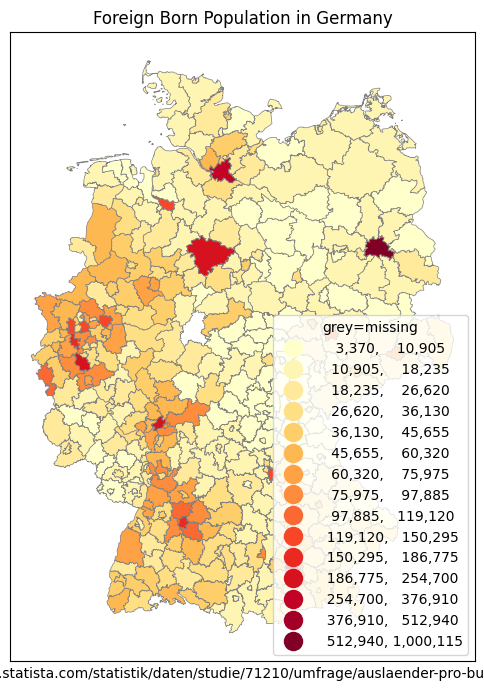

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
gerfb_final.plot(ax=ax,column='Geschlecht_Insgesamt_Anzahl',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=15, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right', 'markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''grey=missing''')

ax.title.set_text("Foreign Born Population in Germany")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/''')

In [69]:
gerfb_percentage = pd.merge(ger0, merged_gerpop, on='county_code2',how='outer',indicator='merge')
gerfb_percentage[['Region','county_code2','merge', 'percentage foreign born']]

gerfb_percentage_final = pd.merge(ger0, merged_gerpop, on='county_code2',how='inner',indicator=False)

,Region,county_code2,merge,percentage foreign born
0,NaN,1.0,right_only,NaN
1,NaN,1.0,right_only,NaN
2,NaN,2.0,right_only,NaN
3,NaN,3.0,right_only,NaN
4,NaN,4.0,right_only,NaN
...,...,...,...,...
514,NaN,NaN,right_only,NaN
515,NaN,NaN,right_only,NaN
516,NaN,NaN,right_only,NaN
517,NaN,NaN,right_only,NaN


<Axes: >

[]

[]

Text(0.5, 151.00200738603556, 'https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/')

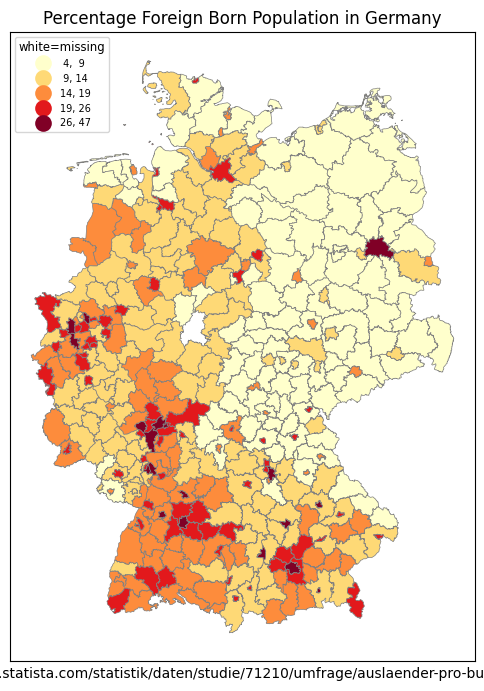

In [70]:
fig, ax = plt.subplots(1, figsize=(6,10))
gerfb_percentage_final.plot(ax=ax,column='percentage foreign born',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
#aok: make fontrs smaller
leg1 = ax.get_legend()
leg1.set_title('''white=missing''')

ax.title.set_text("Percentage Foreign Born Population in Germany")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/''')

<Axes: >

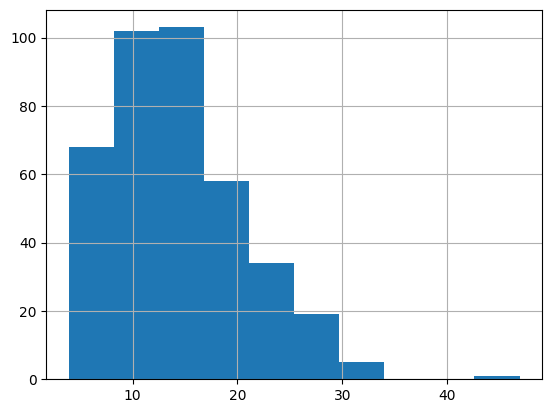

In [71]:
gerfb_percentage_final['percentage foreign born'].hist(bins=10)

<Axes: >

[]

[]

Text(0.5, 151.00200738603556, 'https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/')

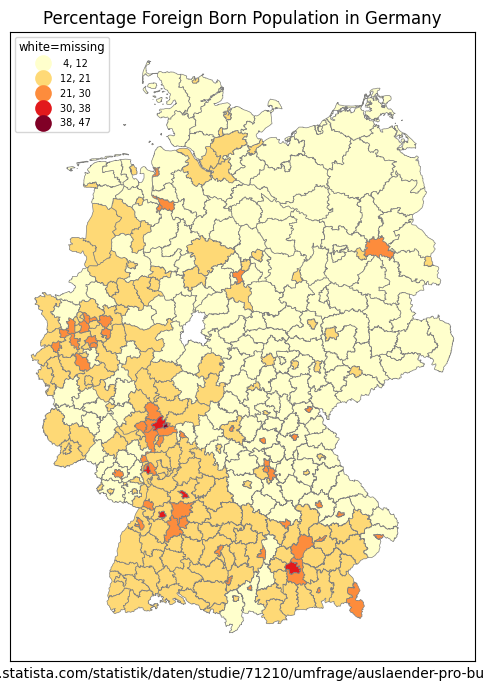

In [72]:
fig, ax = plt.subplots(1, figsize=(6,10))
gerfb_percentage_final.plot(ax=ax,column='percentage foreign born',legend=True,cmap='YlOrRd',
          scheme='equalinterval',k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
#aok: make fontrs smaller
leg1 = ax.get_legend()
leg1.set_title('''white=missing''')

ax.title.set_text("Percentage Foreign Born Population in Germany")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/''')

<Axes: >

Text(0.5, 151.00200738603556, 'https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/')

Text(14.5, 53, 'Berlin')

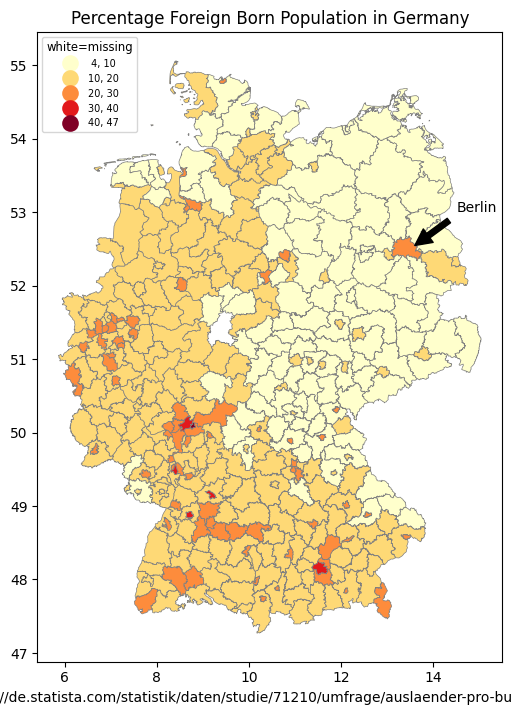

In [77]:
#code for arrow from https://colab.research.google.com/github/theaok/vis/blob/main/all.ipynb#scrollTo=mMgE5rM79Gh0
fig, ax = plt.subplots(1, figsize=(6,10))
gerfb_percentage_final.plot(ax=ax,column='percentage foreign born',legend=True,cmap='YlOrRd',
          scheme="user_defined", classification_kwds={'bins':[10, 20, 30, 40]},k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
#aok: make fontrs smaller
leg1 = ax.get_legend()
leg1.set_title('''white=missing''')

ax.title.set_text("Percentage Foreign Born Population in Germany")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/''')
ax.annotate('Berlin', xy=(13.5, 52.5), xytext=(14.5, 53), #put arrow
            arrowprops=dict(facecolor='black', lw=1,shrink=.1))

<Axes: >

[]

[]

Text(0.5, 151.00200738603556, 'https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/')

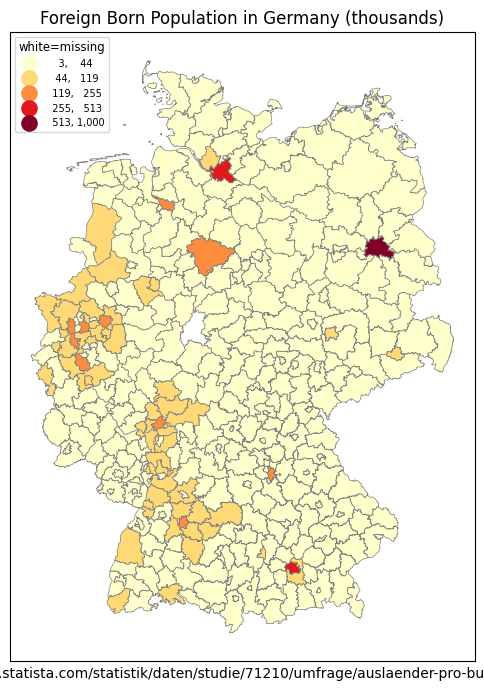

In [ ]:
#aok: some ideas for better fitting legend
gerfb_final['Geschlecht_Insgesamt_Anzahl-k'] = gerfb_final['Geschlecht_Insgesamt_Anzahl']/1000
#express it in thousands

fig, ax = plt.subplots(1, figsize=(6,10))
gerfb_final.plot(ax=ax,column='Geschlecht_Insgesamt_Anzahl-k',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
#aok: make fontrs smaller
leg1 = ax.get_legend()
leg1.set_title('''white=missing''')

ax.title.set_text("Foreign Born Population in Germany (thousands)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/''')

<Axes: >

Text(0.5, 151.00200738603556, 'https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/')

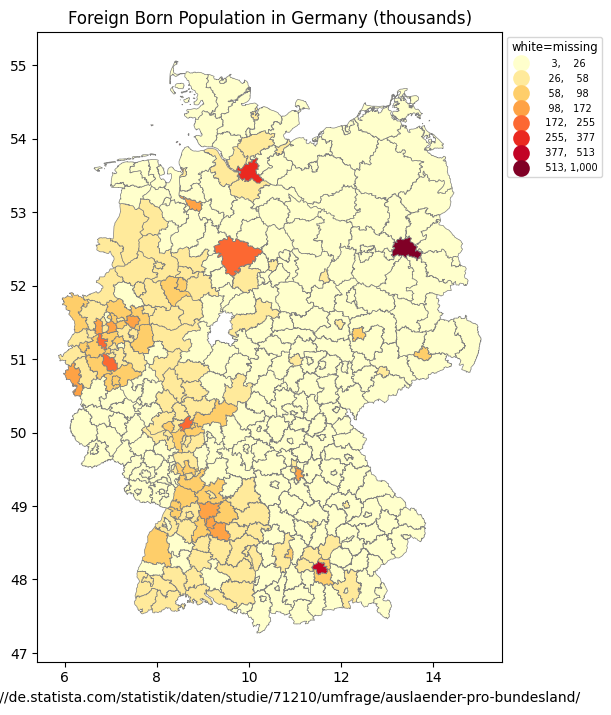

In [ ]:
#aok: put outside

gerfb_final['Geschlecht_Insgesamt_Anzahl-k'] = gerfb_final['Geschlecht_Insgesamt_Anzahl']/1000

fig, ax = plt.subplots(1, figsize=(6,10))
gerfb_final.plot(ax=ax,column='Geschlecht_Insgesamt_Anzahl-k',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=8, edgecolor='grey',linewidth=0.5,
          legend_kwds= {'bbox_to_anchor': (1, 1),"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
leg1 = ax.get_legend()
leg1.set_title('''white=missing''')

ax.title.set_text("Foreign Born Population in Germany (thousands)")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/''')

Votes for AFD

In [22]:
#Shapefile of constituencies from https://www.bundeswahlleiterin.de/bundestagswahlen/2017/wahlkreiseinteilung/downloads.html
! wget -q -O germany_votes.zip https://docs.google.com/uc?id=1g6ZTdJGthLUkgvpLCSwYfOgEhT1EUdO8&export=download

zip_ref = zipfile.ZipFile('germany_votes.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ger_votes=gpd.read_file('Geometrie_Wahlkreise_19DBT_VG250.shp')

<Axes: >

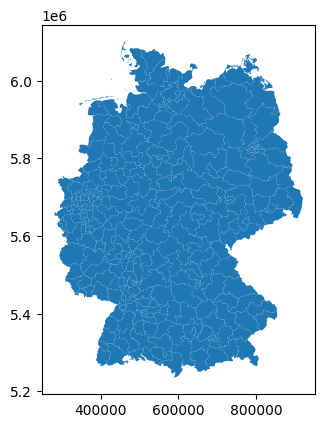

In [23]:
ger_votes.plot()

In [24]:
ger_votes.columns

Index(['WKR_NR', 'WKR_NAME', 'LAND_NR', 'LAND_NAME', 'geometry'], dtype='object')

In [25]:
ger_votes['WKR_NR']

,WKR_NR
0,1
1,2
2,3
3,4
4,5
...,...
294,295
295,296
296,297
297,298


In [26]:
#importing election results of last general election in 2021 from https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html
ger_er=pd.read_excel('https://docs.google.com/uc?id=1kGL6CIsLTWvtCXTKGyI7XI_S1SYSuGYG&export=download')

In [27]:
ger_er.head(5)

,Bundestagswahl 2021 (Wiederholung in Teilen Berlins),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210
0,Amtliches Endergebnis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nr,Gebiet,gehört zu,Wahlberechtigte,NaN,NaN,NaN,Wählende,NaN,NaN,...,NaN,NaN,Thüringer Heimatpartei,NaN,NaN,NaN,Übrige,NaN,NaN,NaN
2,NaN,NaN,NaN,Erststimmen,NaN,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,...,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,NaN
3,NaN,NaN,NaN,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,...,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode
4,1,Flensburg – Schleswig,1,231536,228471,231536,228471,180112,171914,180112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755,NaN,843


In [28]:
#making row 1 the titles of the columns and dropping row 0
ger_results=ger_er.drop(0)
ger_results.columns = ger_results.iloc[0]

In [55]:
ger_results.head(5)

1,Nr,Gebiet,gehört zu,Wahlberechtigte,NaN,NaN,NaN,Wählende,NaN,NaN,...,NaN,NaN,Thüringer Heimatpartei,NaN,NaN,NaN,Übrige,NaN,NaN,NaN
1,Nr,Gebiet,gehört zu,Wahlberechtigte,NaN,NaN,NaN,Wählende,NaN,NaN,...,NaN,NaN,Thüringer Heimatpartei,NaN,NaN,NaN,Übrige,NaN,NaN,NaN
2,NaN,NaN,NaN,Erststimmen,NaN,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,...,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,NaN
3,NaN,NaN,NaN,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,...,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode
4,1,Flensburg – Schleswig,1,231536,228471,231536,228471,180112,171914,180112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755,NaN,843
5,2,Nordfriesland – Dithmarschen Nord,1,188267,186568,188267,186568,145387,139194,145387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,430


In [29]:
ger_afd=ger_results[['Nr','Gebiet','Alternative für Deutschland']]

In [30]:
ger_afd.head(5)

1,Nr,Gebiet,Alternative für Deutschland
1,Nr,Gebiet,Alternative für Deutschland
2,NaN,NaN,Erststimmen
3,NaN,NaN,Endgültig
4,1,Flensburg – Schleswig,9768
5,2,Nordfriesland – Dithmarschen Nord,8274


In [31]:
ger_afd2=ger_afd.drop(index=1).drop(index=2).drop(index=3)

In [59]:
ger_afd2.head(15)

1,Nr,Gebiet,Alternative für Deutschland
4,1,Flensburg – Schleswig,9768
5,2,Nordfriesland – Dithmarschen Nord,8274
6,3,Steinburg – Dithmarschen Süd,10429
7,4,Rendsburg-Eckernförde,10200
8,5,Kiel,7147
9,6,Plön – Neumünster,9404
10,7,Pinneberg,12141
11,8,Segeberg – Stormarn-Mitte,14040
12,9,Ostholstein – Stormarn-Nord,9647
13,10,Herzogtum Lauenburg – Stormarn-Süd,14053


In [32]:
#dataset lists constituencies divided by state and ends each list with the name of the state
#all 16 state names are listed after the second duplicate of 1-16 in the 'Nr' column
#code from ChatGPT

duplicates = ger_afd2[ger_afd2.duplicated('Nr', keep='first')]


In [33]:
duplicates

1,Nr,Gebiet,Alternative für Deutschland
15,1,Schleswig-Holstein,113641
23,13,Mecklenburg-Vorpommern,169977
24,NaN,NaN,NaN
31,2,Hamburg,49828
32,NaN,NaN,NaN
63,3,Niedersachsen,292032
64,NaN,NaN,NaN
67,4,Bremen,21565
68,NaN,NaN,NaN
79,12,Brandenburg,279978


In [34]:
#to get rid the state names from the list, I am dropping the second versions of all duplicates
#code from ChatGPT
ger_afd_3 = ger_afd2.drop_duplicates('Nr', keep='first')

In [63]:
ger_afd_3.head(15)

1,Nr,Gebiet,Alternative für Deutschland
4,1,Flensburg – Schleswig,9768
5,2,Nordfriesland – Dithmarschen Nord,8274
6,3,Steinburg – Dithmarschen Süd,10429
7,4,Rendsburg-Eckernförde,10200
8,5,Kiel,7147
9,6,Plön – Neumünster,9404
10,7,Pinneberg,12141
11,8,Segeberg – Stormarn-Mitte,14040
12,9,Ostholstein – Stormarn-Nord,9647
13,10,Herzogtum Lauenburg – Stormarn-Süd,14053


In [35]:
ger_votes.columns

Index(['WKR_NR', 'WKR_NAME', 'LAND_NR', 'LAND_NAME', 'geometry'], dtype='object')

In [36]:
ger_afd4 = ger_afd_3.rename(columns={'Nr': 'WKR_NR'})

In [37]:
ger_afd4['Alternative für Deutschland'] = pd.to_numeric(ger_afd4['Alternative für Deutschland'], errors='coerce')

In [38]:
ger_afd4

1,WKR_NR,Gebiet,Alternative für Deutschland
4,1,Flensburg – Schleswig,9768.0
5,2,Nordfriesland – Dithmarschen Nord,8274.0
6,3,Steinburg – Dithmarschen Süd,10429.0
7,4,Rendsburg-Eckernförde,10200.0
8,5,Kiel,7147.0
...,...,...,...
326,295,Zollernalb – Sigmaringen,15554.0
329,296,Saarbrücken,12569.0
330,297,Saarlouis,15111.0
331,298,St. Wendel,12346.0


In [39]:
ger_afd5 = pd.merge(ger_afd4, ger_votes, on='WKR_NR',how='outer',indicator=True)
ger_afd5[['WKR_NR','Gebiet','Alternative für Deutschland','_merge']]

ger_afd_2021 = pd.merge(ger_afd4, ger_votes, on='WKR_NR',how='inner',indicator=False)

,WKR_NR,Gebiet,Alternative für Deutschland,_merge
0,1,Flensburg – Schleswig,9768.0,both
1,2,Nordfriesland – Dithmarschen Nord,8274.0,both
2,3,Steinburg – Dithmarschen Süd,10429.0,both
3,4,Rendsburg-Eckernförde,10200.0,both
4,5,Kiel,7147.0,both
...,...,...,...,...
295,296,Saarbrücken,12569.0,both
296,297,Saarlouis,15111.0,both
297,298,St. Wendel,12346.0,both
298,299,Homburg,16210.0,both


In [40]:
type(ger_afd_2021)

pandas.core.frame.DataFrame

In [41]:
gdf = gpd.GeoDataFrame(ger_afd_2021)

<Axes: >

[]

[]

Text(0.5, 151.7224460393233, 'https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html')

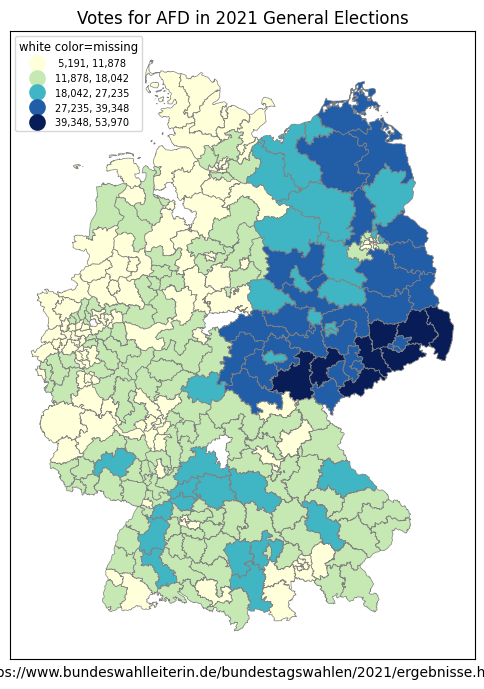

In [42]:
fig, ax = plt.subplots(1, figsize=(6,10))
gdf.plot(ax=ax,column='Alternative für Deutschland',legend=True,cmap='YlGnBu',
                   scheme='naturalbreaks', k=5, edgecolor='grey',linewidth=0.5,
                   legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Votes for AFD in 2021 General Elections")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html''')

#Classification Options

<Axes: >

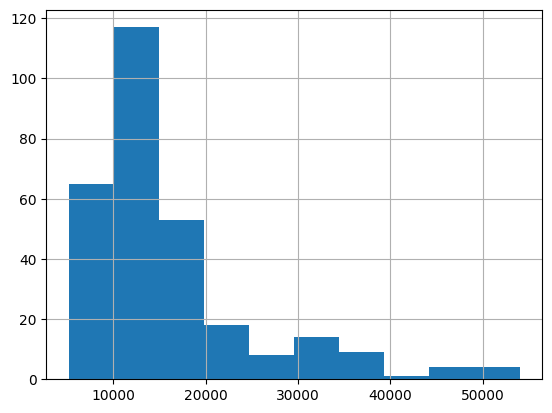

In [43]:
ger_afd4['Alternative für Deutschland'].hist(bins=10)

Manual classification with 3 classes, 0-20000, 20000-40000, 40000-60000

> Blockzitat einfügen



<Axes: >

[]

[]

Text(0.5, 151.7224460393233, 'https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html')

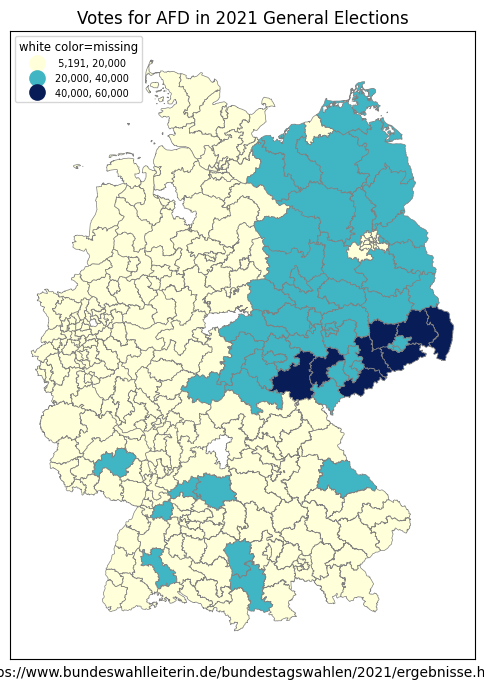

In [79]:
fig, ax = plt.subplots(1, figsize=(6,10))
gdf.plot(ax=ax,column='Alternative für Deutschland',legend=True,cmap='YlGnBu',
                   scheme="user_defined", classification_kwds={'bins':[20000, 40000, 60000]}, edgecolor='grey',linewidth=0.5,
                   legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Votes for AFD in 2021 General Elections")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html''')

Equal intervals with 3 classes

<Axes: >

[]

[]

Text(0.5, 151.7224460393233, 'https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html')

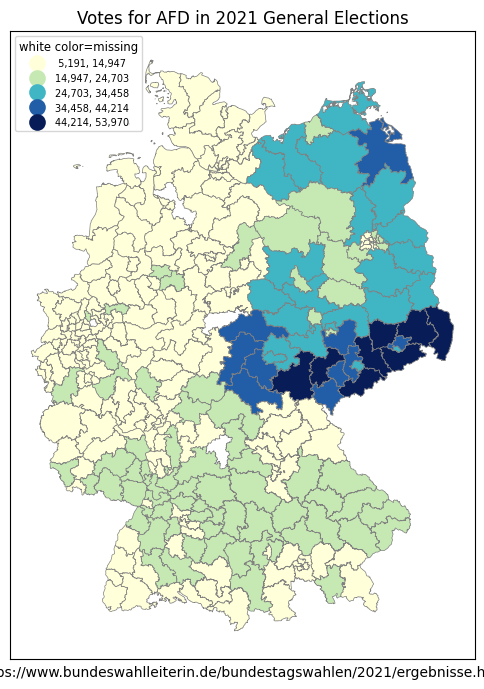

In [82]:
fig, ax = plt.subplots(1, figsize=(6,10))
gdf.plot(ax=ax,column='Alternative für Deutschland',legend=True,cmap='YlGnBu',
                   scheme='equalinterval', k=5, edgecolor='grey',linewidth=0.5,
                   legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Votes for AFD in 2021 General Elections")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html''')